# explore_EV_title_and_registration_activity.ipynb
**Early notebook used to gain some initial insights into the EV title and registration activity.**
+ Contains various lines of code to understand how many records there are by EV type or transaction type.
+ Can also be used to create some basic plots of the EV title and registration activity and the properties of the EVs recorded in this dataset.

In [1]:
import requests
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
df = pd.read_csv("data/vehicles/Electric_Vehicle_Title_and_Registration_Activity.csv", parse_dates=["transaction_date"])

df.head()

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_date,transaction_type,transaction_year,...,dol_vehicle_id,legislative_district,hb_2042_clean_alternative_fuel_vehicle_cafv_eligibility,meets_2019_hb_2042_electric_range_requirement,meets_2019_hb_2042_sale_date_requirement,meets_2019_hb_2042_sale_price_value_requirement,odometer_reading,odometer_code,transportation_electrification_fee_paid,hybrid_vehicle_electrification_fee_paid
0,Plug-in Hybrid Electric Vehicle (PHEV),1G1RB6S55J,2018,CHEVROLET,Volt,Used,0.0,2019-07-01,Registration Renewal,2019,...,290959301,22.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No
1,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S50H,2017,CHEVROLET,Volt,New,0.0,2016-06-30,Original Registration,2016,...,215759750,1.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,6,Actual Mileage,NaN,NaN
2,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S50H,2017,CHEVROLET,Volt,New,0.0,2016-06-30,Original Title,2016,...,215759750,1.0,TRANSACTION NOT ELIGIBLE: Sale before August 2...,True,False,False,6,Actual Mileage,NaN,NaN
3,Battery Electric Vehicle (BEV),1N4AZ0CP9D,2013,NISSAN,Leaf,Used,0.0,2015-05-06,Registration Renewal,2015,...,227913206,5.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,15,Actual Mileage,NaN,NaN
4,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S54H,2017,CHEVROLET,Volt,Used,0.0,2019-04-18,Registration Renewal,2019,...,190099227,45.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No


In [3]:
df.columns

Index(['electric_vehicle_type', 'vin_1_10', 'model_year', 'make', 'model',
       'new_or_used_vehicle', 'sale_price', 'transaction_date',
       'transaction_type', 'transaction_year', 'electric_vehicle_fee_paid',
       'county', 'city', 'zip', 'electric_range', 'base_msrp',
       'non_clean_alternative_fuel', 'date_of_vehicle_sale',
       'vehicle_primary_use', 'state_of_residence', 'dol_vehicle_id',
       'legislative_district',
       'hb_2042_clean_alternative_fuel_vehicle_cafv_eligibility',
       'meets_2019_hb_2042_electric_range_requirement',
       'meets_2019_hb_2042_sale_date_requirement',
       'meets_2019_hb_2042_sale_price_value_requirement', 'odometer_reading',
       'odometer_code', 'transportation_electrification_fee_paid',
       'hybrid_vehicle_electrification_fee_paid'],
      dtype='object')

In [4]:
# Exploratory data analysis
print(df.shape)
print("Year of 'DOL Transaction Date' always equal to 'Transaction Year'?", (df["transaction_date"].dt.year == df["transaction_year"]).all())
print("Number of different VIN (1-10)s:", len(df["vin_1_10"].unique()))
print("# Transactions by type:", df.groupby("transaction_type").size())
print("# EVs by type:", df.groupby("electric_vehicle_type").size())
print("# EVs by type:", df.groupby(["transaction_type", "electric_vehicle_type"]).size())
print("# EVs by type:", df.groupby(["transaction_type", "electric_vehicle_type"]).size()/df.groupby("transaction_type").size())

(510000, 30)
Year of 'DOL Transaction Date' always equal to 'Transaction Year'? True
Number of different VIN (1-10)s: 6332
# Transactions by type: transaction_type
Original Registration               111522
Original Title                      110333
Registration Renewal                235130
Registration at time of Transfer     25673
Transfer Title                       27342
dtype: int64
# EVs by type: electric_vehicle_type
Battery Electric Vehicle (BEV)            360664
Plug-in Hybrid Electric Vehicle (PHEV)    149336
dtype: int64
# EVs by type: transaction_type                  electric_vehicle_type                 
Original Registration             Battery Electric Vehicle (BEV)             82417
                                  Plug-in Hybrid Electric Vehicle (PHEV)     29105
Original Title                    Battery Electric Vehicle (BEV)             81746
                                  Plug-in Hybrid Electric Vehicle (PHEV)     28587
Registration Renewal              Batter

In [184]:
109890-87686,89107+20783,109890-25460

(22204, 109890, 84430)

In [187]:
print(64647/87685) #pop_size_history
print(80808/109890) #derived from title+reg. activity

0.7372640702514683
0.7353535353535353


In [10]:
tmp = df[df["transaction_type"].str.contains("Renewal")]
print(tmp.groupby("transaction_type").size())
print(tmp.groupby(["new_or_used_vehicle", "transaction_type"]).size())

transaction_type
Registration Renewal    235130
dtype: int64
new_or_used_vehicle  transaction_type    
Used                 Registration Renewal    235130
dtype: int64


In [5]:
date_range = [dt.datetime(y,m,1) for y in range(2010,2023) for m in range(1,13)]

df["transaction_date"].describe()
#date_range

C:\Users\steff\AppData\Local\Temp/ipykernel_20928/2663275607.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["transaction_date"].describe()


count                  510000
unique                   3402
top       2022-02-18 00:00:00
freq                     1507
first     2010-01-06 00:00:00
last      2022-02-28 00:00:00
Name: transaction_date, dtype: object

In [12]:
dff = df.loc[df["transaction_date"] < dt.datetime.strptime("2017-01-01", "%Y-%m-%d")]
dff.shape

(90606, 30)

In [12]:
# df_plot = df
df_plot = df[df["county"] == "Pierce"]
# df_plot = df[df["Zip"] == 98119]
df_plot = df_plot[df_plot["electric_vehicle_type"]=="Battery Electric Vehicle (BEV)"]
df_plot.shape

(23925, 30)

array([[<AxesSubplot:title={'center':'sale_price'}>]], dtype=object)

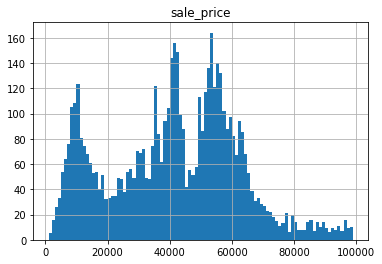

In [14]:
# df_plot.hist("DOL Transaction Date", by="Zip", bins=date_range, figsize=(18,5))
# df_plot[df_plot["Zip"] < 98300].hist("DOL Transaction Date", by="Zip", bins=date_range, figsize=(18,5))
df_plot[df_plot["sale_price"]>0].hist("sale_price", bins=range(1000,100000,1000))

In [15]:
# transfer_title_ind = df.index[df["transaction_type"] == "Original Title"]
transfer_title_ind = df.index[df["transaction_type"] == "Transfer Title"]
# transfer_title_ind = df.index[df["transaction_type"] == "Original Registration"]
# transfer_title_ind = df.index[df["transaction_type"] == "Registration Renewal"]
# transfer_title_ind = df.index[df["transaction_type"] == "Registration at time of Transfer"]
print(transfer_title_ind)
#transfer_title_ind, transfer_title_ind[4]
transfer_related_index = []
for i in transfer_title_ind:
    #print(i)
#     if df.loc[i,"vin_1_10"] == df.loc[i+1,"vin_1_10"]:
    if df.loc[i,"vin_1_10"] == df.loc[i+1,"vin_1_10"] and df.loc[i,"transaction_date"] == df.loc[i+1,"transaction_date"]:
        #print(i,i+1)
        transfer_related_index += [i+1]
#     elif df.loc[i,"vin_1_10"] == df.loc[i-1,"vin_1_10"]:
    elif df.loc[i,"vin_1_10"] == df.loc[i-1,"vin_1_10"] and df.loc[i,"transaction_date"] == df.loc[i-1,"transaction_date"]:
        #print(i,i-1)
        transfer_related_index += [i-1]

transfer_related_index
d = df.loc[transfer_related_index, ["vin_1_10", "transaction_date", "transaction_type"]]
print(d.head())
print(d.groupby("transaction_type").size())

Int64Index([    11,     34,     41,     55,     81,    115,    154,    163,
               166,    170,
            ...
            509784, 509804, 509845, 509852, 509877, 509879, 509931, 509951,
            509953, 509995],
           dtype='int64', length=27342)
       vin_1_10 transaction_date                  transaction_type
12   5YJSA1E25G       2019-05-01  Registration at time of Transfer
33   JN1AZ0CP5C       2016-05-03  Registration at time of Transfer
40   2T3YL4DV8D       2016-09-06  Registration at time of Transfer
82   1N4AZ0CP1G       2019-05-09  Registration at time of Transfer
114  JN1AZ0CP3C       2015-05-11  Registration at time of Transfer
transaction_type
Registration at time of Transfer    23224
dtype: int64


In [18]:
#create count of BEVs in each ZIP code based on "Original Registration" for each month since Jan 2017
times = [(y, m) for y in range(2017,2022) for m in range(1,13)]
zip_codes = df["zip"].unique()
# zip_codes = zip_codes[zip_codes>99800]
multiindex = pd.MultiIndex.from_product([times, zip_codes], names=["time", "zip"])
final_df = pd.DataFrame(index=multiindex)
# final_df.head(20)
for t in times:
    #print(df.groupby("Zip").size())
    final_df[t] = df.groupby("zip").size()
# keep a dataframe containing all entries for each zip code at each step in time

In [19]:
final_df.head()

(2017, 1)  (2017, 2)  (2017, 3)  (2017, 4)  (2017, 5)  \
time      zip                                                              
(2017, 1) 98501.0        NaN        NaN        NaN        NaN        NaN   
          98011.0        NaN        NaN        NaN        NaN        NaN   
          98019.0        NaN        NaN        NaN        NaN        NaN   
          98053.0        NaN        NaN        NaN        NaN        NaN   
          98108.0        NaN        NaN        NaN        NaN        NaN   

                   (2017, 6)  (2017, 7)  (2017, 8)  (2017, 9)  (2017, 10)  \
time      zip                                                               
(2017, 1) 98501.0        NaN        NaN        NaN        NaN         NaN   
          98011.0        NaN        NaN        NaN        NaN         NaN   
          98019.0        NaN        NaN        NaN        NaN         NaN   
          98053.0        NaN        NaN        NaN        NaN         NaN   
          98108.0        NaN        NaN        NaN        NaN         NaN   

                   ...  (2021, 3)  (2021, 4)  (2021, 5)  (2021, 6)  (2021, 7)  \
time      zip      ...                                                          
(2017, 1) 98501.0  ...        NaN        NaN        NaN        NaN        NaN   
          98011.0  ...        NaN        NaN        NaN        NaN        NaN   
          98019.0  ...        NaN        NaN        NaN        NaN        NaN   
          98053.0  ...        NaN        NaN        NaN        NaN        NaN   
          98108.0  ...        NaN        NaN        NaN        NaN        NaN   

                   (2021, 8)  (2021, 9)  (2021, 10)  (2021, 11)  (2021, 12)  
time      zip                                                                
(2017, 1) 98501.0        NaN        NaN         NaN         NaN         NaN  
          98011.0        NaN        NaN         NaN         NaN         NaN  
          98019.0        NaN        NaN         NaN         NaN         NaN  
          98053.0        NaN        NaN         NaN         NaN         NaN  
          98108.0        NaN        NaN         NaN         NaN         NaN  

[5 rows x 60 columns]